In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Introduction

### [DIGIT Recognizer](https://www.kaggle.com/c/digit-recognizer)
<img src="images/front_page.png" style="width:350px;height:200px;">

# Data load & Pretreatment

In [205]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [206]:
df_train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
df_test.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
dfY = df_train["label"]
dfY = pd.get_dummies(dfY)
dfY = dfY.as_matrix().reshape(len(dfY), -1).T

In [209]:
dfX = df_train.drop("label", axis = 1)
dfX /= np.max(np.max(dfX))
dfX = dfX.as_matrix().reshape(len(dfX), -1).T

In [210]:
df_test /= np.max(np.max(df_test))
df_test = df_test.as_matrix().reshape(len(df_test), -1).T

#### Normalizing inputs

In [217]:
dfX = (dfX - np.mean(dfX)) / np.std(dfX)
df_test = (df_test - np.mean(df_test)) / np.std(df_test)

In [8]:
del df_train

# EDA

#### data shape

In [180]:
np.shape(dfX), np.shape(dfY), np.shape(df_test)

((784, 42000), (10, 42000), (784, 28000))

#### train set images

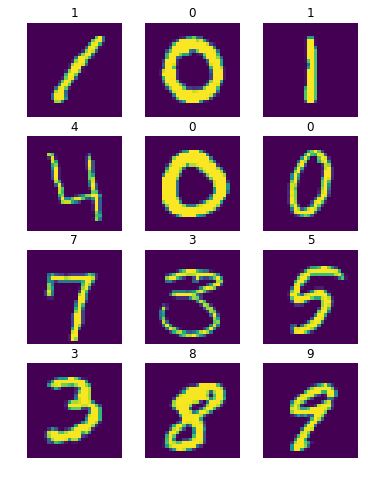

In [201]:
plt.figure(figsize=(6, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(dfX[:, i].reshape(28,28))
    plt.axis('off')
    plt.title(np.where(dfY[:, i] == 1)[0][0])
plt.show()

#### test set images

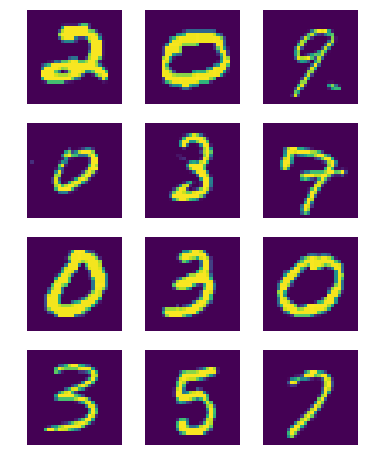

In [182]:
plt.figure(figsize=(6, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(df_test[:, i].reshape(28,28))
    plt.axis('off')
plt.show()

#### labels distribution

[4132 4684 4177 4351 4072 3795 4137 4401 4063 4188]


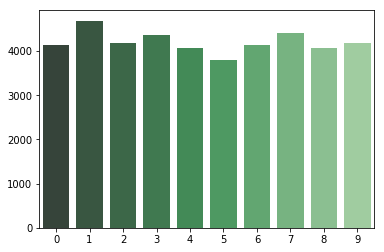

In [12]:
sns.barplot(list(range(10)), np.sum(dfY, axis=1), palette='Greens_d')
print(np.sum(dfY, axis=1))

In [13]:
#check None Value
# assert(dfX.isnull().any().count() == np.shape(dfX)[1])
# assert(dfY.isnull().any().count() == np.shape(dfY)[1])

# function

In [131]:
def layer_sizes(dfX, dfY):
    """
    Arguments:
    dfX -- input dataset of shape (input size, number of examples)
    dfY -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_hi -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = dfX.shape[0]      # size of input layer
    n_h1 = 256
    n_h2 = 128
    n_h3 = 128
    n_y = dfY.shape[0]      # size of output layer
    layer_dims = (n_x, n_h1, n_h2, n_h3, n_y)
    
    return layer_dims

In [132]:
layer_dims = layer_sizes(dfX, dfY)
layer_dims

(784, 256, 128, 128, 10)

In [133]:
def initialize_parameters(layer_dims):
    """
    Argument:
    layer_dims -- output of layer_sizes()
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h1, n_x)
                    b1 -- bias vector of shape (n_h1, 1)
                    W2 -- weight matrix of shape (n_h2, n_h1)
                    b2 -- bias vector of shape (n_h2, 1)
                    W3 -- weight matrix of shape (n_y, n_h2)
                    b3 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(0)
    
    parameters = {}
    L = len(layer_dims)   
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.1
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    
    return parameters

In [134]:
parameters = initialize_parameters(layer_dims)
# parameters

In [135]:
for i in parameters.keys():
    print("shape {} :".format(i), np.shape(parameters[i]))

shape W1 : (256, 784)
shape b1 : (256, 1)
shape W2 : (128, 256)
shape b2 : (128, 1)
shape W3 : (128, 128)
shape b3 : (128, 1)
shape W4 : (10, 128)
shape b4 : (10, 1)


In [136]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [137]:
A, W, b = dfX, parameters['W1'], parameters['b1']
Z, linear_cache = linear_forward(A, W, b)
print(Z.shape)
print("Z = " + str(Z))

(256, 42000)
Z = [[-0.77773815 -4.35866678 -0.98031035 ..., -2.30466824 -2.18948154
  -1.64403224]
 [ 2.09005949  0.86355422 -0.33259814 ..., -0.27170747  0.64257345
   0.40952854]
 [-0.61408159  0.43941051 -0.82427132 ..., -0.87902476 -0.56368313
  -1.19716513]
 ..., 
 [-1.09383622  0.48491366 -0.55589661 ..., -0.32952898 -1.63280494
  -1.17637186]
 [-0.40874809 -2.56619376  0.11131967 ..., -1.3034728   0.45366759
  -0.86199782]
 [ 1.05330363 -1.01222882  0.84780927 ...,  0.25236444  0.63664942
   0.40705933]]


In [138]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    
    assert(A.shape == Z.shape)
    
    cache = Z
    
    return A, cache

In [139]:
sigmoid(Z)[0]

array([[ 0.31480757,  0.01263378,  0.27283021, ...,  0.09073708,
         0.10069904,  0.16191714],
       [ 0.88993325,  0.7034027 ,  0.41760859, ...,  0.43248796,
         0.65533496,  0.60097483],
       [ 0.35112869,  0.60811856,  0.30485773, ...,  0.29337991,
         0.36269568,  0.23197991],
       ..., 
       [ 0.25089658,  0.61890749,  0.36449743, ...,  0.41835523,
         0.16344647,  0.23570517],
       [ 0.39921234,  0.07134608,  0.52780121, ...,  0.21358113,
         0.61151088,  0.29692211],
       [ 0.74140878,  0.26654389,  0.70010739, ...,  0.56275838,
         0.65399567,  0.60038255]])

In [140]:
def relu(Z):
    """
    Implement the RELU activation in numpy.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [141]:
relu(Z)[0]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.09005949,  0.86355422,  0.        , ...,  0.        ,
         0.64257345,  0.40952854],
       [ 0.        ,  0.43941051,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.48491366,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.11131967, ...,  0.        ,
         0.45366759,  0.        ],
       [ 1.05330363,  0.        ,  0.84780927, ...,  0.25236444,
         0.63664942,  0.40705933]])

In [142]:
def softmax(Z):
    """
    Implement the softmax activation in numpy.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.exp(Z) / sum(np.exp(Z))
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [143]:
softmax(Z)[0]

array([[  1.31577917e-03,   2.11394546e-05,   1.08989609e-03, ...,
          2.02856594e-04,   2.91567909e-04,   5.62427107e-04],
       [  2.31553686e-02,   3.91810022e-03,   2.08296961e-03, ...,
          1.54914751e-03,   4.95091620e-03,   4.38446248e-03],
       [  1.54973752e-03,   2.56372990e-03,   1.27394884e-03, ...,
          8.43991803e-04,   1.48188669e-03,   8.79302211e-04],
       ..., 
       [  9.59187165e-04,   2.68308256e-03,   1.66611755e-03, ...,
          1.46211392e-03,   5.08746339e-04,   8.97777193e-04],
       [  1.90297619e-03,   1.26927264e-04,   3.24693795e-03, ...,
          5.52080980e-04,   4.09868746e-03,   1.22941775e-03],
       [  8.21096778e-03,   6.00389818e-04,   6.78152488e-03, ...,
          2.61634079e-03,   4.92167353e-03,   4.37364970e-03]])

In [144]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu" or "tanh" or "softmax"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    Z, linear_cache = linear_forward(A_prev, W, b)  
    
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        A, activation_cache = relu(Z)
        
    elif activation == "softmax":
        A, activation_cache = softmax(Z)   
        
    elif activation == "tanh":
        A, activation_cache = np.tanh(Z), Z
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    
    cache = (linear_cache, activation_cache)  

    return A, cache     # g(Z), ((A, W, b), g(Z))

In [145]:
A_prev, W, b = dfX, parameters['W1'], parameters['b1']

In [146]:
linear_activation_forward(A_prev, W, b, activation='tanh')[0]

array([[-0.65140655, -0.99967261, -0.75320022, ..., -0.98027954,
        -0.97523382, -0.92803415],
       [ 0.96986755,  0.69808437, -0.32085339, ..., -0.26521292,
         0.56664924,  0.38807229],
       [-0.54699385,  0.4131557 , -0.67738797, ..., -0.70593041,
        -0.51070505, -0.83278787],
       ..., 
       [-0.79827403,  0.45017016, -0.50492655, ..., -0.31809748,
        -0.92646   , -0.82630413],
       [-0.38740918, -0.98826437,  0.11086211, ..., -0.8626145 ,
         0.4249091 , -0.69728557],
       [ 0.78308743, -0.7666823 ,  0.68992325, ...,  0.24713998,
         0.56261386,  0.38597294]])

In [147]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the LINEAR -> RELU -> LINEAR  TANH -> LINEAR -> SIGMOID -> LINEAR -> SOFTMAX computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2
    
#     for l, act in zip(range(1, L), ['relu', 'tanh', 'sigmoid']):
    for l in range(1, L):
        A_prev = A 
#         A, cache = linear_activation_forward(A_prev, parameters['W{}'.format(l)], parameters['b{}'.format(l)], activation = act)
        A, cache = linear_activation_forward(A_prev, parameters['W{}'.format(l)], parameters['b{}'.format(l)], activation = 'relu')
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters['W{}'.format(L)], parameters['b{}'.format(L)], activation = "softmax")
    caches.append(cache)
    
    assert(AL.shape == (10, X.shape[1]))
            
    return AL, caches    # A[4], ((A[0], W1, b1, (Z1)), (A[1], W2, b2, (Z2)), (A[2], W3, b3, (Z3)), (A[3], W4, b4, (Z4)))

In [148]:
A4, caches = L_model_forward(dfX, parameters)
print(A4.shape)
A4

(10, 42000)


array([[ 0.15947807,  0.42593811,  0.13137724, ...,  0.09646508,
         0.25295374,  0.09117925],
       [ 0.17773794,  0.10411621,  0.21923921, ...,  0.28373169,
         0.14169276,  0.14572942],
       [ 0.16556886,  0.05250996,  0.10871867, ...,  0.09389576,
         0.05535855,  0.11806757],
       ..., 
       [ 0.1218831 ,  0.2071502 ,  0.16728853, ...,  0.18983825,
         0.17259848,  0.19701596],
       [ 0.04212411,  0.01016343,  0.03120057, ...,  0.01547168,
         0.04635204,  0.06052308],
       [ 0.13177386,  0.06774398,  0.15026938, ...,  0.10711403,
         0.15695012,  0.15843846]])

### Loss function

$$ L(\hat{y},y) = -\frac{1}{m}\Sigma_jY_jlog\hat{y}_j $$

$$ J = \frac{1}{m}\Sigma_{i=1}^mL(\hat{y^{(i)}},y^{(i)}) + \frac{\lambda}{2m}\Sigma_{l=1}^L\|W^{[l]}\|^2$$

In [149]:
def compute_cost(AL, Y, caches, Lambd=1):
    """
    Implement the cost function.

    Arguments:
    AL -- probability matrix, output of the forward propagation (L_model_forward())
    Y -- ture"label" numpy ndarray
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
    Lambd -- regularization parameter
    
    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]
    w_norm = np.sum([np.sum(caches[i][0][1]**2) for i in range(len(caches))])
    cost = -1/m * np.sum(np.sum(Y * np.log(AL), axis = 1, keepdims=True)) + (Lambd * w_norm) / (2*m)
    
    assert(cost.shape == ())
    
    return cost

In [168]:
cost = compute_cost(A4, dfY, caches, Lambd=1)
cost

2.4928627404963524

### Backword propagation 
+ input : $da^{[l]}$ 
+ output : $da^{[l-1]}, dW^{[l]}, db^{[l]}$

$$ dZ^{[l]} = da^{[l]} * g^{[l]'}(Z^{[l]}) $$

$$ dW^{[l]} = dZ^{[l]} * a^{[l-1]} + \frac{\lambda}{m}W^{[l]} $$

$$ db^{[l]} = dZ^{[l]} $$

$$ da^{[l-1]} = W^{[l]T} \bullet dz^{[l]}  $$

$$ dZ^{[l]} = W^{[l+1]T} \bullet dZ^{[l+1]} * g^{[l]'}(Z^{[l]}) $$

In [151]:
def linear_backward(dZ, cache, Lambd=1):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
    Lambd -- regularization parameter

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1 / m * np.dot(dZ,A_prev.T) + Lambd * W /m
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

#### 4-layer (softmax)
+ differential

$$ a^{[4]}_i = P_i = \frac{e^{Z^{[4]}_i}}{\Sigma_i e^{Z^{[4]}_i}} $$

$$ g^{[4]'}_i(Z^{[4]}_i) = \frac{\partial g(Z^{[4]}_i)}{\partial Z^{[4]}_i} = P_i(1 - P_i)$$

$$ g^{[4]'}_j(Z^{[4]}_i) = \frac{\partial g(Z^{[4]}_i)}{\partial Z^{[4]}_j} = - P_i * P_j $$

+ input
$$ da^{[4]} = \frac{\partial L}{\partial a^{[4]}_i} = P_i - y_i$$

+ output

$$ dZ^{[4]}_i = \frac{\partial L}{\partial a^{[4]}_i}\frac{\partial a^{[4]}_i}{\partial Z^{[4]}_i} = (P_i - y_i){P_i(1 - P_i)}$$

$$ da^{[3]} = W^{[4]T} \bullet dZ^{[4]}_i  $$

$$ dW^{[4]} = dZ^{[4]}_i * a^{[3]} + \frac{\lambda}{m}W^{[4]}$$

$$ db^{[4]} = dZ^{[4]}_i $$

In [152]:
def softmax_backward(dA, cache):
    """
    Implement the backward propagation for a single Softmax unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    p, _ = softmax(Z)
    dZ = dA * p * (1 - p)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

#### 3-layer (sigmoid)
+ differential
$$ a^{[3]}_i = \frac{1}{1 + e^{Z^{[3]}_i}} $$

$$ g^{[3]'}(Z^{[3]}_i) = \frac{\partial g(Z^{[3]}_i)}{\partial Z^{[3]}_i} = \frac{1}{1 + e^{Z^{[3]}_i}}{(1 -  \frac{1}{1 + e^{Z^{[3]}_i}})} = a^{[3]}_i(1 - a^{[3]}_i)$$

+ input
$$ da^{[3]} = \frac{\partial L}{\partial a^{[3]}_i} = W^{[4]T} \bullet dZ^{[4]}_i  $$

+ output

$$ dZ^{[3]}_i = \frac{\partial L}{\partial a^{[3]}_i}\frac{\partial a^{[3]}_i}{\partial Z^{[3]}_i} = W^{[4]T} \bullet dZ^{[4]}_i * a^{[3]}_i(1 - a^{[3]}_i)$$

$$ da^{[2]} = W^{[3]T} \bullet dZ^{[3]}_i  $$

$$ dW^{[3]} = dZ^{[3]}_i * a^{[2]} + \frac{\lambda}{m}W^{[3]}$$

$$ db^{[3]} = dZ^{[3]}_i $$

In [153]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s, _ = sigmoid(Z)
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

#### 2-layer (tanh)
+ differential
$$ a^{[2]}_i = tanh(Z^{[2]}_i) = \frac{1 - e^{Z^{[2]}_i}}{1 + e^{Z^{[2]}_i}} $$

$$ g^{[2]'}(Z^{[2]}_i) = \frac{\partial a^{[2]}_i}{\partial Z^{[2]}_i} = (1 - \frac{1 - e^{Z^{[2]}_i}}{1 + e^{Z^{[2]}_i}})(1 + \frac{1 - e^{Z^{[2]}_i}}{1 + e^{Z^{[2]}_i}}) = (1 - a^{[2]}_i)(1 + a^{[2]}_i)$$

+ input
$$ da^{[2]} = \frac{\partial L}{\partial a^{[2]}_i} = W^{[3]T} \bullet dZ^{[3]}_i  $$

+ output
$$ dZ^{[2]}_i = \frac{\partial L}{\partial a^{[2]}_i}\frac{\partial a^{[2]}_i}{\partial Z^{[2]}_i} = W^{[3]T} \bullet dZ^{[3]}_i * (1 - a^{[2]}_i)(1 + a^{[2]}_i)$$

$$ da^{[1]} = W^{[2]T} \bullet dZ^{[2]}_i  $$

$$ dW^{[2]} = dZ^{[2]}_i * a^{[1]} + \frac{\lambda}{m}W^{[2]}$$

$$ db^{[2]} = dZ^{[2]}_i $$

In [154]:
def tanh_backward(dA, cache):
    """
    Implement the backward propagation for a single Tanh unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    t = np.tanh(Z)
    dZ = dA * (1 - t) * (1 + t)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

#### 1-layer (relu)
+ differential

$$ a^{[1]}_i = max({0, Z^{[1]}_i})$$

$$ g^{[1]'}(Z^{[1]}_i) = \frac{\partial a^{[1]}_i}{\partial Z^{[1]}_i} =\begin{cases}
0, & \mbox{if }Z^{[1]}_i \le 0 \\
1, & \mbox{if }Z^{[1]}_i > 0
\end{cases}$$

+ input
$$ da^{[1]} = W^{[2]T} \bullet dZ^{[2]}_i  $$

+ output
$$ dZ^{[1]}_i = \frac{\partial L}{\partial a^{[1]}_i}\frac{\partial a^{[1]}_i}{\partial Z^{[1]}_i} = \begin{cases}
0, & \mbox{if }Z^{[1]}_i \le 0 \\
 W^{[2]T} \bullet dZ^{[2]}_i, & \mbox{if }Z^{[1]}_i > 0
\end{cases}$$

$$ da^{[0]} = W^{[1]T} \bullet dZ^{[1]}_i  $$

$$ dW^{[1]} = dZ^{[1]}_i * a^{[0]} + \frac{\lambda}{m}W^{[1]}$$

$$ db^{[1]} = dZ^{[1]}_i $$

In [155]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) 
    
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [156]:
def linear_activation_backward(dA, cache, activation, Lambd=1):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu" or "tanh" or "softmax"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, Lambd)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, Lambd)
        
    elif activation == "tanh":
        dZ = tanh_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, Lambd)
        
    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, Lambd)
    
    return dA_prev, dW, db

In [157]:
dA_prev, dW, db = linear_activation_backward(dA=A4 - dfY, cache=caches[3], activation='softmax')
# dA_prev, dW, db

In [158]:
def L_model_backward(AL, Y, caches, Lambd=1):
    """
    Implement the backward propagation for the LINEAR -> RELU -> LINEAR  TANH -> LINEAR -> SIGMOID -> LINEAR -> SOFTMAX group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- ture"label" numpy ndarray
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches)         
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    # Initializing the backpropagation
    dAL = AL - dfY
    
    current_cache = caches[L-1]
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "softmax", Lambd=Lambd)
    
#     for l, act_func in zip(reversed(range(L-1)), ['sigmoid', 'tanh', 'relu']):
    for l in reversed(range(L-1)):
        current_cache = caches[l]
#         dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l + 1)], current_cache, activation = act_func)
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l + 1)], current_cache, activation = 'relu', Lambd=Lambd)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [159]:
grads = L_model_backward(A4, dfY, caches)
# grads

In [160]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters

In [161]:
parameters = update_parameters(parameters, grads, learning_rate=0.02)
# parameters

# modeling

In [170]:
def L_layer_model(dfX, dfY, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, Lambd=1):
    """
    Implements a L-layer neural network: LINEAR -> RELU -> LINEAR  TANH -> LINEAR -> SIGMOID -> LINEAR -> SOFTMAX.
    
    Arguments:
    X -- data, numpy ndarray of shape (num_px * num_px, number of examples)
    Y -- ture"label" numpy ndarray (containing 0, 1), of shape (10, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []
    
    layers_dims = layer_sizes(dfX, dfY)
    
    parameters = initialize_parameters(layers_dims)
    
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(dfX, parameters)
        
        cost = compute_cost(AL, dfY, caches, Lambd=Lambd)
        
        grads = L_model_backward(AL, dfY, caches, Lambd=Lambd)

        parameters = update_parameters(parameters, grads, learning_rate)
                
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 2.492863
Cost after iteration 100: 2.240551
Cost after iteration 200: 2.097509
Cost after iteration 300: 1.972237
Cost after iteration 400: 1.851318
Cost after iteration 500: 1.730880
Cost after iteration 600: 1.611545
Cost after iteration 700: 1.503163
Cost after iteration 800: 1.422909
Cost after iteration 900: 1.407305
Cost after iteration 1000: 1.479776


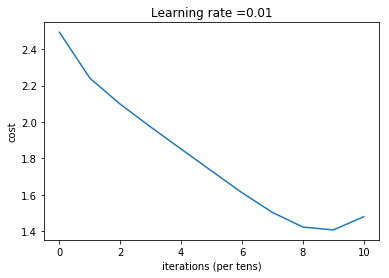

Wall time: 53min 31s


In [172]:
%%time
parameters = L_layer_model(dfX, dfY, learning_rate = 0.01, num_iterations = 1001, print_cost=True)

In [47]:
# parameters

In [48]:
# test, _ = L_model_forward(df_test, parameters)

In [49]:
# test = pd.DataFrame(pd.DataFrame(test).idxmax(), columns=['Label'])
# test.index.name='ImageId'
# test.index += 1 
# test.tail()

,Label
27996,7
27997,7
27998,3
27999,9
28000,2


In [50]:
# test.to_csv('test.csv')

## 개선사항 
+ ~~Regularization~~
+ ~~Normalizing inputs~~
+ Vanishing/exploding gradients
+ Mini-batch
+ Dropout vs Batch Normalizing
+ Adam optimization
+ Hyperparameter tuning